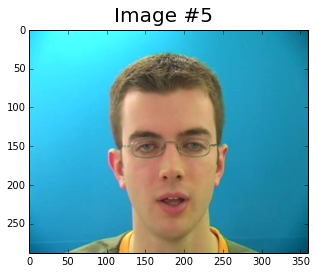

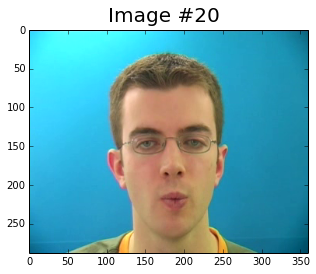

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import imageio

GRID_DIR = '/home/yy/thesis/grid_corpus/video/'
filename = 's5/lway7s.mpg'

vid = imageio.get_reader(GRID_DIR+filename,  'ffmpeg')
nums = [5, 20]
for num in nums:
    img = vid.get_data(num)
    fig = plt.figure()
    fig.suptitle('Image #{}'.format(num), fontsize=20)
    plt.imshow(img)

1 faces found.
(103, 82, 161, 161)


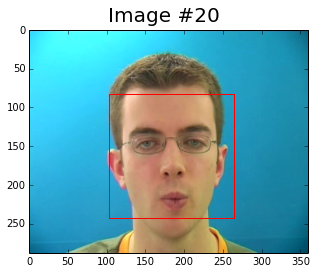

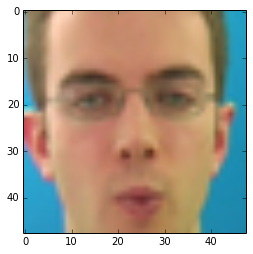

In [4]:
import cv2
import numpy as np
import matplotlib.patches as patches
import Image

final_size = (48, 48)

# Load face detector
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Grayscale the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 5)
print('{} faces found.'.format(len(faces)))

fig = plt.figure()
fig.suptitle('Image #{}'.format(num), fontsize=20)
plt.imshow(img)
ax = plt.gca()

for (x,y,w,h) in faces:
    print(x,y,w,h)
    ax.add_patch(patches.Rectangle((x, y), w, h, fill=False, edgecolor="red"))

# Resize the face to 48x48
x,y,w,h = faces[0]
im = Image.fromarray(img[y:y+h,x:x+w])
im.thumbnail(final_size, Image.ANTIALIAS)
extracted_face = np.array(im.getdata(),np.uint8).reshape(im.size[1], im.size[0], 3)

plt.figure()
plt.imshow(extracted_face)